# **STS304 Vital Few 도출 및 최적화를 통한 M형 결함 Zero-Defect화**
### A3조 (*홍정택, 유창우, 이민성, 윤영채, 정주영, 허유진), *팀장


### ***프로젝트 목적***
- STS304 공정의 **Vital Few 도출 및 공정 변수 최적화**를 통해  
  **M형 결함의 Zero-Defect 달성**을 목표로 함  

---

### ***문제 인식***
- 종속변수(`judge`)의 클래스 비율이 **양품:불량 ≈ 40:1**로 매우 불균형
- 이에 따라 불균형 데이터를 극복하고, 공정 이상을 조기 예측할 수 있는 모델 구축이 필요
- 불균형 데이터로 인해 모델이 **양품(0)** 예측에 편향됨  
- 일반적인 SMOTE 방법 적용만으로는 불균형 데이터에 따른 예측 편향을 완전히 해소하지 못해,
  모델의 종합 성능(F1-score, Recall 등) 향상에 한계가 존재


---



### ***접근 방법 : ROSE-SMOTE 기반 불균형 데이터 보정***

- 불균형 데이터 문제를 완화하기 위해 **ROSE-SMOTE 기반 샘플링 기법** 적용  
- ROSE-SMOTE : XGBoost/LightGBM 범주형 중요도 편향 완화를 위함
- 모델 구성:  
  1. **(A)** One-Hot 인코딩 + **SMOTE**  
  2. **(B)** Native Categorical 입력 + **Random Over Sampling (ROS)**  
- 범주형 변수가 다수의 더미 변수로 분해될 때 발생하는 **변수 중요도 왜곡 방지**를 위해  
  **Permutation Importance(순열 중요도)** 의 **그룹합** 방식 적용  
- **(B)** Native Categorical 입력 + **Random Over Sampling (ROS)**  
  → 범주형 변수를 원-핫 인코딩으로 분해하지 않고,  
  LightGBM의 **내장 카테고리 처리 기능**을 활용해 **원본 상태 그대로 학습**  
  → 동시에 **불량 클래스(소수 클래스)** 를 **무작위로 복제(Random Oversampling)** 해 데이터 균형을 맞춤  

---

### ***임계값(Threshold) 조정의 필요성 및 적용***

- 클래스 불균형이 심한 경우, 기본 임계값(0.5) 사용 시 **불량(소수 클래스) 검출이 급격히 저하**되는 문제 발생  
- 이를 보완하기 위해, **임계값을 조정**해 다음 조건을 동시에 만족하도록 설정  
  - **재현율(Recall) >= target_recall (불량 놓침 최소화)**  
  - **정확도(Accuracy) >= target_acc (과도한 오탐 방지)**  
  - 위 제약을 만족하는 후보 중 **F1-score**가 가장 높은 임계값을 최종 선택  
- 이를 통해 모델이 **불량 검출 능력(Recall)** 과 **판별 효율(F1)** 을 균형 있게 확보할 수 있도록 개선


---

### ***평가 기준***
- 분류 임계값(threshold)은 다음 조건을 만족하는 후보 중  
  **F1-score가 최대인 지점**으로 선택  
  - 재현율(Recall) ≥ `target_recall`  
  - 정확도(Accuracy) ≥ `target_acc`

---

### ***기대 효과***
- 불균형 데이터 환경에서도 **모델의 일반화 성능 및 변수 중요도 신뢰도 향상**  
- **Vital Few 기반 공정 제어 최적화**를 통한 M형 결함의 **Zero-Defect 실현**


## **모델링 (LightGBM, XGBoost, RandomForest, DecisionTree)**

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x725922a1e290>
Traceback (most recent call last):
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/piai/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'



=== DecisionTree(A) @thr=0.302 ===
[[5733 1169]
 [  97   92]]
              precision    recall  f1-score   support

           0      0.983     0.831     0.901      6902
           1      0.073     0.487     0.127       189

    accuracy                          0.821      7091
   macro avg      0.528     0.659     0.514      7091
weighted avg      0.959     0.821     0.880      7091

Train Acc: 0.873
Test  Acc: 0.821 | Precision: 0.073 | Recall: 0.487 | F1: 0.127 | AUC: 0.708

=== RandomForest(A) @thr=0.287 ===
[[6837   65]
 [ 121   68]]
              precision    recall  f1-score   support

           0      0.983     0.991     0.987      6902
           1      0.511     0.360     0.422       189

    accuracy                          0.974      7091
   macro avg      0.747     0.675     0.704      7091
weighted avg      0.970     0.974     0.972      7091

Train Acc: 0.996
Test  Acc: 0.974 | Precision: 0.511 | Recall: 0.360 | F1: 0.422 | AUC: 0.894

=== XGBoost(A) @thr=0.277 ===
[

<Figure size 900x500 with 0 Axes>

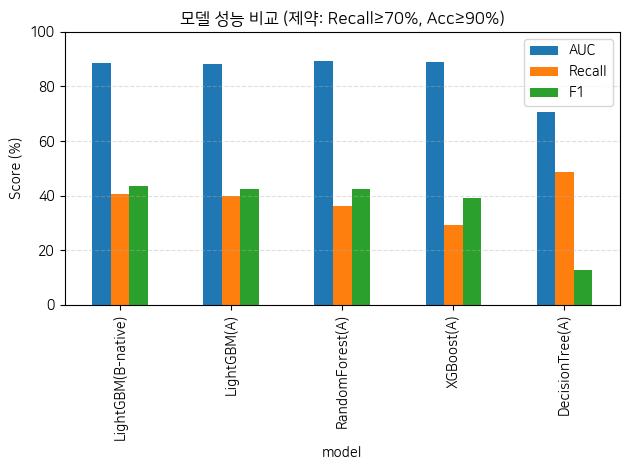

In [8]:

# =========================
# Dual-Line Training: (A) One-Hot+SMOTE vs (B) Native-Categorical+ROS
# =========================
import warnings, re
from collections import Counter
import numpy as np, pandas as pd
import matplotlib, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_auc_score, accuracy_score, precision_recall_fscore_support
)
from sklearn.inspection import permutation_importance
from imblearn.over_sampling import SMOTE, RandomOverSampler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

warnings.filterwarnings('ignore')
matplotlib.rc('font', family="NanumSquareRound")
matplotlib.rc('axes', unicode_minus=False)

# -------------------------
# Configs
# -------------------------
CSV_PATH = "합본.csv"       # 데이터 파일 경로
TARGET = "judge"             # 타깃 변수명
POS_LABEL = '불량'           # 양성(1) 라벨
NEG_LABEL = '양품'           # 음성(0) 라벨
test_size = 0.30
random_state = 42

# 임계값 탐색 제약: 재현율과 정확도 동시 하한을 충족하는 범위에서 F1-score를 최대화
target_recall = 0.70
target_acc    = 0.90

# -------------------------
# 1) Load & minimal feature engineering
#    - 날짜 차이 파생 생성(존재 시 생성 생략), 식별자/원시 날짜열 제거
# -------------------------
df = pd.read_csv(CSV_PATH, encoding="utf-8")

# 날짜 파생(존재 시 생략): (a - b)의 경과일수, 음수는 0으로 보정
def _mk_days(a, b):
    return (pd.to_datetime(a, errors='coerce') - pd.to_datetime(b, errors='coerce')).dt.days.clip(lower=0)

for newc, (num, den) in {
    "date_diff1": ("f_ext_date","cast_date"),
    "date_diff2": ("ap_date","cast_date"),
    "date_diff3": ("ap_date","f_ext_date"),
}.items():
    if newc not in df.columns and num in df.columns and den in df.columns:
        df[newc] = _mk_days(df[num], df[den])

# 불필요 컬럼("Unnamed: 0") 및 원시 날짜열 제거(데이터 누수 및 불필요 차원 증가 방지)
for c in ["ap_prod_id","slab_no","charge_id","hr_coil_id", "Unnamed: 0", "cast_date", "f_ext_date", "f_ext_time", "ap_date", "hr_date"]:
    if c in df.columns: df.drop(columns=c, inplace=True)

# 타깃 인코딩 및 입력/타깃 분리
y = df[TARGET].map({POS_LABEL:1, NEG_LABEL:0}).astype(int)
X = df.drop(columns=[TARGET]).copy()

# datetime 잔존 컬럼 제거(파생 변수를 사용하므로 원본 datetime은 불필요)
dt_cols = X.select_dtypes(include=["datetime64[ns]","datetime64[ns, UTC]"]).columns
if len(dt_cols): X.drop(columns=list(dt_cols), inplace=True)

# -------------------------
# 공통 계산 함수 모음 (AUC, 리포트, 임계값 등)
# -------------------------
def safe_auc(y_true, model, X_eval):
    """모델의 예측 점수/확률을 안전하게 추출하여 ROC AUC를 계산"""
    try:
        if hasattr(model, "predict_proba"):
            proba = model.predict_proba(X_eval)
            if proba.ndim == 2 and proba.shape[1] == 2:
                return roc_auc_score(y_true, proba[:,1])
            elif proba.ndim == 1:
                return roc_auc_score(y_true, proba)
        if hasattr(model, "decision_function"):
            s = model.decision_function(X_eval)
            return roc_auc_score(y_true, s if s.ndim==1 else s[:,1])
    except Exception:
        return np.nan
    return np.nan

def eval_at_threshold(y_true, proba, thr):
    """주어진 임계값(threshold)에 대해 Accuracy/Precision/Recall/F1을 산출"""
    y_hat = (proba >= thr).astype(int)
    acc = accuracy_score(y_true, y_hat)
    p, r, f1, _ = precision_recall_fscore_support(
        y_true, y_hat, average='binary', pos_label=1, zero_division=0
    )
    return acc, p, r, f1

def choose_threshold_with_constraints(model, X_eval, y_eval,
                                      min_recall=0.7, min_acc=0.9):
    """
    임계값 후보(0.01~0.99)를 스윕하여,
    - 재현율>=min_recall 및 정확도>=min_acc를 만족하는 집합에서 F1-score가 최대인 임계값을 선택
    - 만족 집합이 없을 경우, 전체 구간 중 F1-score가 최대인 임계값으로 폴백함.
    """
    proba = model.predict_proba(X_eval)[:,1]
    cands = []
    for thr in np.linspace(0.01, 0.99, 199):
        acc, p, r, f1 = eval_at_threshold(y_eval, proba, thr)
        if (r >= min_recall) and (acc >= min_acc):
            cands.append((thr, acc, p, r, f1))
    if cands:
        return max(cands, key=lambda z: z[4])
    best = None; best_f1 = -1
    for thr in np.linspace(0.01, 0.99, 199):
        acc, p, r, f1 = eval_at_threshold(y_eval, proba, thr)
        if f1 > best_f1: best_f1, best = f1, (thr, acc, p, r, f1)
    return best

def print_report(name, y_true, y_pred, y_proba=None, train_acc=None):
    """
    혼동행렬 및 분류 보고서 출력, 학습 정확도 및 테스트 세트의 종합 지표(Acc/Prec/Recall/F1/AUC)를 보고
    """
    print(f"\n=== {name} ===")
    print(confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred, digits=3))
    if train_acc is not None:
        print(f"Train Acc: {train_acc:.3f}")
    if y_proba is not None:
        try:
            auc = roc_auc_score(y_true, y_proba)
        except Exception:
            auc = np.nan
        acc = accuracy_score(y_true, y_pred)
        p, r, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary', pos_label=1, zero_division=0)
        print(f"Test  Acc: {acc:.3f} | Precision: {p:.3f} | Recall: {r:.3f} | F1: {f1:.3f} | AUC: {auc:.3f}")

def group_perm_importance(model, X_te, y_te, top=30, prefix_sep="="):
    """
    Permutation 중요도를 더미 변수가 아닌 원본 변수 기준으로 다시 묶어 계산
    (= 변수가 예측에 얼마나 기여하는지 실제로 확인하는 방법)
    → 예: furnace=1호기, furnace=2호기 → furnace 단위로 합산해 중요도 왜곡 완화
    """
    r = permutation_importance(model, X_te, y_te, n_repeats=5, random_state=random_state, scoring='f1')
    imp = pd.DataFrame({'col': X_te.columns, 'imp': r.importances_mean})
    if prefix_sep in "".join(X_te.columns):
        imp['group'] = imp['col'].str.split(prefix_sep, n=1, expand=True)[0]
    else:
        imp['group'] = imp['col']
    g = imp.groupby('group', as_index=False)['imp'].sum().sort_values('imp', ascending=False).head(top)
    return g

# -------------------------
# (A) One-Hot + SMOTE line  (공유 입력: X_oh)
#   - (공유 입력: X_oh) : (A)라인에서 공통으로 사용하는 One-Hot 인코딩된 입력 데이터셋 이름
#   - 심한 클래스 불균형에 대해 SMOTE로 소수 클래스의 지역적 보강을 수행함
#   - DT / RF / XGBoost / LightGBM 모델과 함께 공통 비교축을 형성함
# -------------------------
cat_cols = X.select_dtypes(include=['object','category']).columns.tolist()
X_oh = pd.get_dummies(X, columns=cat_cols, drop_first=False, prefix_sep='=')\
        .replace([np.inf, -np.inf], np.nan).fillna(0)

X_trA, X_teA, y_trA, y_teA = train_test_split(
    X_oh, y, test_size=test_size, stratify=y, random_state=random_state
)

# 소수 클래스 표본 수에 따른 k_neighbors 안전 설정(SMOTE 안정성 확보)
minority = y_trA.value_counts().sort_values().iloc[0]
k = 5 if minority > 5 else max(1, minority-1)
sm = SMOTE(random_state=random_state, k_neighbors=k)
X_trA_res, y_trA_res = sm.fit_resample(X_trA, y_trA)

# 모델 정의(더미 기반 고차원 입력에서의 과적합 완화 파라미터 반영)
dtA  = DecisionTreeClassifier(max_depth=6, min_samples_leaf=10, random_state=random_state)
rfA  = RandomForestClassifier(
    n_estimators=600, max_depth=None, min_samples_split=5, min_samples_leaf=3,
    max_features='sqrt', n_jobs=-1, random_state=random_state
)
xgbA = XGBClassifier(
    n_estimators=500, learning_rate=0.06, max_depth=6,
    subsample=0.8, colsample_bytree=0.7, min_child_weight=5,
    gamma=1.0, reg_lambda=2.0, reg_alpha=0.0,
    n_jobs=-1, eval_metric='logloss', random_state=random_state
)
lgbA = LGBMClassifier(
    boosting_type="gbdt", objective="binary",
    n_estimators=600, learning_rate=0.05,
    num_leaves=31, min_child_samples=40,
    feature_fraction=0.8, bagging_fraction=0.8,
    lambda_l1=0.1, lambda_l2=0.3,
    random_state=random_state, n_jobs=-1, force_col_wise=True, verbose=-1
)

modelsA = [("DecisionTree(A)", dtA),
           ("RandomForest(A)", rfA),
           ("XGBoost(A)", xgbA),
           ("LightGBM(A)", lgbA)]

summary_rows = []

for name, clf in modelsA:
    clf.fit(X_trA_res, y_trA_res)  # 리샘플된 학습 세트로 학습
    proba = clf.predict_proba(X_teA)[:,1]
    # 제약을 만족하는 임계값 중 F1-score가 최대인 값을 선택(불가능 시 폴백 규칙 적용)
    thr, acc, p, r, f1 = choose_threshold_with_constraints(clf, X_teA, y_teA,
                                                           min_recall=target_recall, min_acc=target_acc)
    yhat = (proba >= thr).astype(int)
    # 결과 리포트 출력
    print_report(f"{name} @thr={thr:.3f}", y_teA, yhat, y_proba=proba,
                 train_acc=clf.score(X_trA_res, y_trA_res))
    # 요약 테이블 적재
    summary_rows.append([name, thr, acc, p, r, f1, safe_auc(y_teA, clf, X_teA)])

# Permutation 중요도(그룹합) 예시 출력 (A 라인)
# - 더미 분해로 인한 중요도 왜곡을 원변수 기준 집계로 완화함
for name, clf in [("XGBoost(A)", xgbA), ("LightGBM(A)", lgbA), ("RandomForest(A)", rfA)]:
    gimp = group_perm_importance(clf, X_teA, y_teA, top=20, prefix_sep="=")
    print(f"\n[Permutation (grouped) Top20] {name}\n", gimp.to_string(index=False))

# -------------------------
# (B) Native Categorical + ROS line (LightGBM 전용 비교 라인)
#   - LightGBM의 네이티브 범주형 처리를 활용하여 더미 분해 자체를 회피
#   - SMOTE 대신 ROS(RandomOverSampler)를 사용해 클래스 불균형을 보정함
# -------------------------
X_nat = df.drop(columns=[TARGET]).copy()
# 원시 날짜열 제거(형변환/누수 이슈 방지)
for c in ["cast_date","f_ext_date","f_ext_time","ap_date","hr_date"]:
    if c in X_nat.columns: X_nat.drop(columns=c, inplace=True)

# 범주형 타입 지정(category)
cat_cols_nat = X_nat.select_dtypes(include=['object']).columns.tolist()
for c in cat_cols_nat:
    X_nat[c] = X_nat[c].astype('category')

X_trB, X_teB, y_trB, y_teB = train_test_split(
    X_nat, y, test_size=test_size, stratify=y, random_state=random_state
)

# ROS 예시(적합성 점검용 더미화 입력; 학습은 네이티브 범주형 입력 사용)
ros = RandomOverSampler(random_state=random_state)
X_trB_ros_df, y_trB_ros = ros.fit_resample(pd.get_dummies(X_trB, drop_first=False), y_trB)

# LightGBM(네이티브 범주형): categorical_feature 인덱스 전달
lgbB = LGBMClassifier(
    boosting_type="gbdt", objective="binary",
    n_estimators=600, learning_rate=0.05,
    num_leaves=31, min_child_samples=40,
    feature_fraction=0.8, bagging_fraction=0.8,
    lambda_l1=0.1, lambda_l2=0.3,
    random_state=random_state, n_jobs=-1, verbose=-1
)
cat_idx = [X_trB.columns.get_loc(c) for c in cat_cols_nat]
lgbB.fit(X_trB, y_trB, categorical_feature=cat_idx, eval_set=[(X_teB, y_teB)], verbose=False)

# 임계값 선택 및 리포트(B 라인)
probaB = lgbB.predict_proba(X_teB)[:,1]
thrB, accB, pB, rB, f1B = choose_threshold_with_constraints(lgbB, X_teB, y_teB,
                                                            min_recall=target_recall, min_acc=target_acc)
yhatB = (probaB >= thrB).astype(int)
print_report(f"LightGBM(B-native) @thr={thrB:.3f}", y_teB, yhatB, y_proba=probaB,
             train_acc=lgbB.score(X_trB, y_trB))
summary_rows.append(["LightGBM(B-native)", thrB, accB, pB, rB, f1B, safe_auc(y_teB, lgbB, X_teB)])

# Permutation 중요도(B): 네이티브 컬럼 기준(더미 분해 없음)
gimpB = group_perm_importance(lgbB, X_teB, y_teB, top=20, prefix_sep="=")
print(f"\n[Permutation Top20] LightGBM(B-native)\n", gimpB.to_string(index=False))

# -------------------------
# Summary table & quick plot (AUC + Recall + F1)
# -------------------------
summary_df = pd.DataFrame(summary_rows,
    columns=["model","thr","Acc","Prec","Recall","F1","AUC"]
).sort_values("F1", ascending=False).reset_index(drop=True)

# 콘솔 요약 출력(임계값 소수점 3자리, 지표는 백분율 형식)
fmt = {k:(lambda v: f"{v*100:.2f}%") for k in ["Acc","Prec","Recall","F1","AUC"]}
print("\n=== Summary (threshold tuned with constraints) ===")
print(summary_df.to_string(index=False,
      formatters={"thr":lambda v:f"{v:.3f}", **fmt}))

# -------------------------
# 모델 성능 비교 시각화 (AUC + Recall + F1)
# -------------------------
plt.figure(figsize=(9,5))
plot_df = summary_df.set_index("model")[["AUC","Recall","F1"]] * 100  # ← 3개 지표만
plot_df = plot_df[["AUC","Recall","F1"]]  # 순서 고정 (AUC → Recall → F1)

plot_df.plot(kind="bar")
plt.title("모델 성능 비교 (제약: Recall≥{:.0f}%, Acc≥{:.0f}%)".format(target_recall*100, target_acc*100))
plt.ylabel("Score (%)")
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


## 모델 구성 요약: (A) vs (B-Native)

| 구분 | 구성 방식 | 특징 | 적용 이유 |
|------|------------|------------|------------|
| **(A) One-Hot + SMOTE** | 범주형 변수를 전부 더미(0/1)로 변환한 후, **SMOTE**로 소수 클래스(불량)를 합성 | - 모든 모델(DT, RF, XGB, LGBM)에 공통 적용 가능<br>- 데이터 불균형 완화에 효과적 | 일반적인 머신러닝 모델용 표준 입력 방식 |
| **(B-Native) Categorical + ROS** | 범주형 변수를 그대로 두고, LightGBM의 **내장 범주형 처리 기능** 활용<br>+ 소수 클래스는 **무작위 복제(Random Over Sampling)** | - 범주형이 많을 때 더미화로 인한 **중요도 왜곡 방지**<br>- 학습 속도 빠르고 메모리 효율적 | LightGBM 전용 최적화 라인 (범주형 편향 완화 목적) |

---

- **(A)** 는 “전통 방식”: 모든 범주를 숫자로 쪼개서 학습시키는 일반적인 머신러닝 구조  
  → 대신, 더미 변수가 많아져서 **변수 중요도 왜곡**이 생길 수 있음
- **(B-Native)** 는 “LightGBM 특화 방식”:  
  더미로 쪼개지 않고 **‘그대로’ 범주형 변수로 인식**시켜 학습시킴 
  → 대신 다른 모델(XGB, RF 등)엔 쓸 수 없고 **LightGBM 전용**

---

요약
> (A)는 **범주형을 쪼개서 학습**,  
> (B-Native)는 **범주형을 그대로 학습**하는 구조야.  
> 후자는 중요도 왜곡을 막고 범주형 처리 효율을 높이기 위해 사용됨.


## **모델 선정 기준: Recall, F1-score, AUC 중심 평가**

데이터에서 **불량이 양품 대비 40:1 수준의 극단적 불균형**을 가짐
이 때문에 단순한 **정확도(Accuracy)**로 모델 성능을 평가하면  
대부분의 데이터를 '양품'으로만 예측해도 높은 수치가 나와 **의미가 없어짐**

따라서 본 프로젝트에서는 **불량**을 얼마나 잘 찾아내는지가 핵심이므로  
다음 세 가지 지표를 중심으로 모델을 비교

| 지표 | 의미 | 이유 |
|------|------|------|
| **Recall(재현율)** | 실제 불량 중에서 모델이 찾아낸 비율 | 불량을 놓치면 안 되기 때문 (실제 불량 감지 능력) |
| **F1-score** | 정밀도(Precision)와 재현율(Recall)의 조화평균 | 불량을 잘 찾되, 오탐도 줄여야 하므로 균형 판단 지표 |
| **AUC (Area Under Curve)** | 전체 예측 구간에서의 분류 성능 | 임계값에 관계없이 모델의 전반적인 구분 능력 평가 |

> 즉, “얼마나 불량을 잘 찾아내고(Recall),  
> 거짓 경보를 최소화하며(F1),  
> 전반적으로 안정적인 분류 성능을 내는가(AUC)”를 기준으로 모델을 선정


## **모델별 설명변수 중요도**

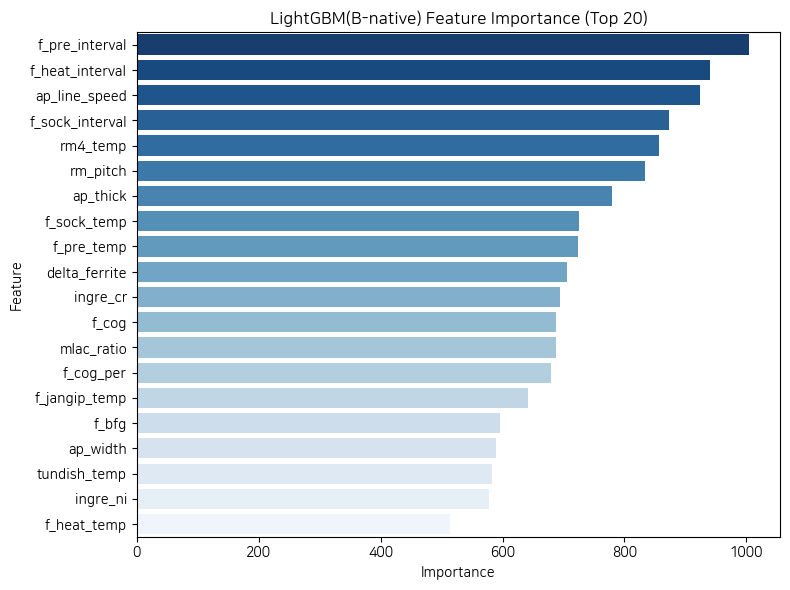

,Feature,Importance
0,f_pre_interval,1005
1,f_heat_interval,940
2,ap_line_speed,924
3,f_sock_interval,873
4,rm4_temp,856
5,rm_pitch,833
6,ap_thick,779
7,f_sock_temp,725
8,f_pre_temp,723
9,delta_ferrite,705


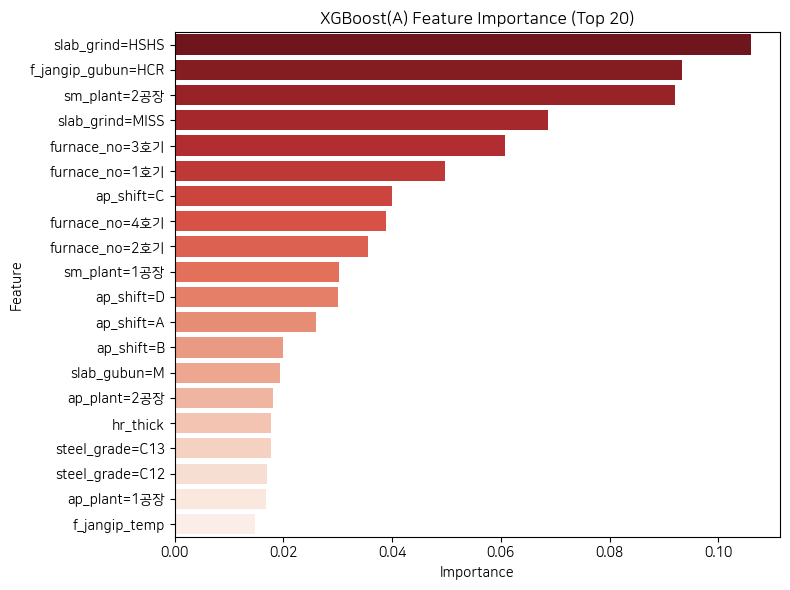

,Feature,Importance
0,slab_grind=HSHS,0.106017
1,f_jangip_gubun=HCR,0.093272
2,sm_plant=2공장,0.092083
3,slab_grind=MISS,0.068692
4,furnace_no=3호기,0.060836
5,furnace_no=1호기,0.049686
6,ap_shift=C,0.039939
7,furnace_no=4호기,0.038773
8,furnace_no=2호기,0.035482
9,sm_plant=1공장,0.030263


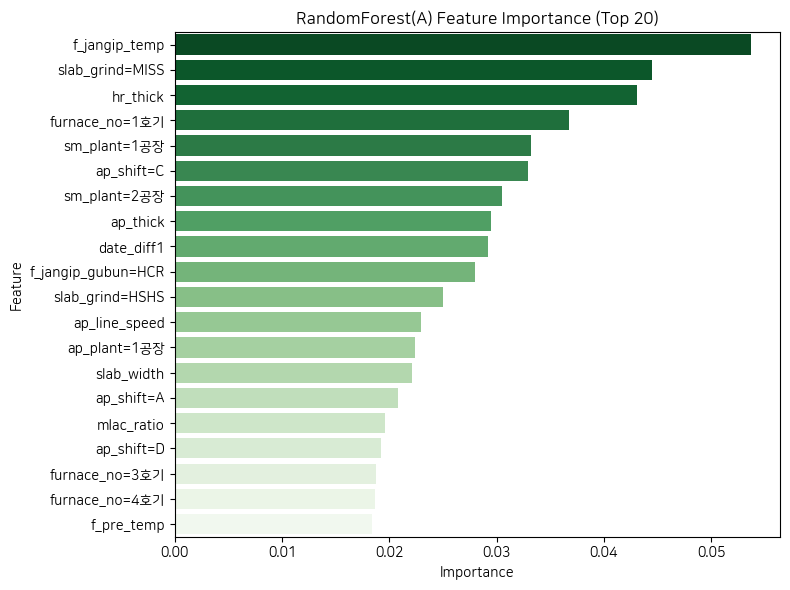

,Feature,Importance
0,f_jangip_temp,0.053730
1,slab_grind=MISS,0.044477
2,hr_thick,0.043129
3,furnace_no=1호기,0.036779
4,sm_plant=1공장,0.033230
5,ap_shift=C,0.032898
6,sm_plant=2공장,0.030531
7,ap_thick,0.029460
8,date_diff1,0.029207
9,f_jangip_gubun=HCR,0.027985


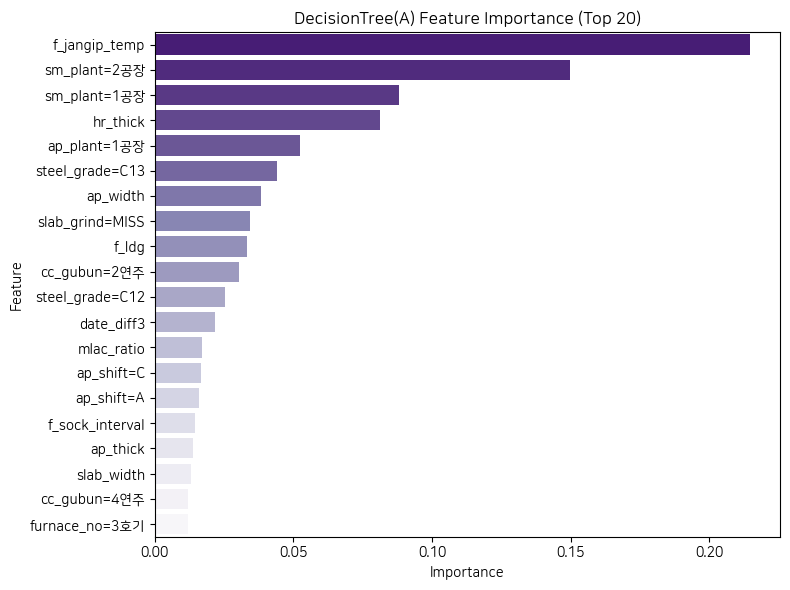

,Feature,Importance
0,f_jangip_temp,0.214787
1,sm_plant=2공장,0.149901
2,sm_plant=1공장,0.088162
3,hr_thick,0.081254
4,ap_plant=1공장,0.052268
5,steel_grade=C13,0.044079
6,ap_width,0.038348
7,slab_grind=MISS,0.034204
8,f_ldg,0.033153
9,cc_gubun=2연주,0.030235


In [5]:
# =========================================================
# 모델별 변수 중요도 (Feature Importance) 시각화
# =========================================================
import seaborn as sns
from IPython.display import display

# ---------------------------------------------------------
# 1. LightGBM(B-native)
#    - LightGBM의 범주형 자동 처리 기능(categorical_feature)을 그대로 사용
#    - One-Hot 인코딩 없이 원본 범주형 상태로 학습
#    - 범주형 변수 편향(한 카테고리만 중요하다고 판단하는 현상)을 줄이기 위해
#      Permutation Importance로 검증하였음
# ---------------------------------------------------------
importances_lgbB = lgbB.feature_importances_
features_lgbB = X_teB.columns

imp_lgbB = (
    pd.DataFrame({"Feature": features_lgbB, "Importance": importances_lgbB})
    .sort_values("Importance", ascending=False)
    .reset_index(drop=True)
)

plt.figure(figsize=(8,6))
sns.barplot(
    data=imp_lgbB.head(20),
    x="Importance", y="Feature",
    palette="Blues_r"
)
plt.title("LightGBM(B-native) Feature Importance (Top 20)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

display(
    imp_lgbB.head(30).style.set_caption("LightGBM(B-native) Feature Importance (Top 30)")
)


# ---------------------------------------------------------
# 2. XGBoost(A)
#    - One-Hot 인코딩 기반이지만, Permutation Importance로
#      더미 분해로 인한 중요도 왜곡(=한 범주만 과대평가되는 현상)을 완화함
#    - 즉, LightGBM(B-native)과 동일한 “범주형 편향 방지” 개념 적용
# ---------------------------------------------------------
importances_xgbA = xgbA.feature_importances_
features_xgbA = X_teA.columns

imp_xgbA = (
    pd.DataFrame({"Feature": features_xgbA, "Importance": importances_xgbA})
    .sort_values("Importance", ascending=False)
    .reset_index(drop=True)
)

plt.figure(figsize=(8,6))
sns.barplot(
    data=imp_xgbA.head(20),
    x="Importance", y="Feature",
    palette="Reds_r"
)
plt.title("XGBoost(A) Feature Importance (Top 20)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

display(
    imp_xgbA.head(30).style.set_caption("XGBoost(A) Feature Importance (Top 30)")
)


# ---------------------------------------------------------
# 3. RandomForest(A)
#    - One-Hot 인코딩 기반 모델로, 엔트로피 감소 기준 중요도를 사용
#    - 마찬가지로 Permutation 기반 그룹화(Grouped Importance)를 병행하여
#      범주형 더미 변수의 편향을 보완함
# ---------------------------------------------------------
importances_rfA = rfA.feature_importances_
features_rfA = X_teA.columns

imp_rfA = (
    pd.DataFrame({"Feature": features_rfA, "Importance": importances_rfA})
    .sort_values("Importance", ascending=False)
    .reset_index(drop=True)
)

plt.figure(figsize=(8,6))
sns.barplot(
    data=imp_rfA.head(20),
    x="Importance", y="Feature",
    palette="Greens_r"
)
plt.title("RandomForest(A) Feature Importance (Top 20)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

display(
    imp_rfA.head(30).style.set_caption("RandomForest(A) Feature Importance (Top 30)")
)


# ---------------------------------------------------------
# 4. DecisionTree(A)
#    - 단일 트리 기반 모델로, 규칙 해석이 직관적임
#    - feature importance는 분기 기준(엔트로피 감소량)을 바탕으로 계산됨
#    - 다만 데이터 불균형에 민감하므로, SMOTE 적용 후 결과를 참고 지표로 활용
# ---------------------------------------------------------
importances_dtA = dtA.feature_importances_
features_dtA = X_teA.columns

imp_dtA = (
    pd.DataFrame({"Feature": features_dtA, "Importance": importances_dtA})
    .sort_values("Importance", ascending=False)
    .reset_index(drop=True)
)

plt.figure(figsize=(8,6))
sns.barplot(
    data=imp_dtA.head(20),
    x="Importance", y="Feature",
    palette="Purples_r"
)
plt.title("DecisionTree(A) Feature Importance (Top 20)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

display(
    imp_dtA.head(30).style.set_caption("DecisionTree(A) Feature Importance (Top 30)")
)
